<a href="https://colab.research.google.com/github/vivianchen98/boston_housing_price/blob/master/codeathon_1_boston_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Codeathon 1 - Boston housing prices**

# Step 1. Big Picture & Setup

In [0]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 2. Get the data

In [0]:
import pandas as pd # Pandas module to enable data manipulation

DOWNLOAD_URL = "https://raw.githubusercontent.com/vivianchen98/boston_housing_price/master/housing.csv"

# get the data
housing = pd.read_csv(DOWNLOAD_URL,header=None)
housing = housing[0].str.split(expand = True)

# columns are:
    # - CRIM     per capita crime rate by town
    # - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    # - INDUS    proportion of non-retail business acres per town
    # - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    # - NOX      nitric oxides concentration (parts per 10 million)
    # - RM       average number of rooms per dwelling
    # - AGE      proportion of owner-occupied units built prior to 1940
    # - DIS      weighted distances to five Boston employment centres
    # - RAD      index of accessibility to radial highways
    # - TAX      full-value property-tax rate per $10,000
    # - PTRATIO  pupil-teacher ratio by town
    # - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    # - LSTAT    % lower status of the population
    # - MEDV     Median value of owner-occupied homes in $1000's

housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [0]:
# cast the entries from object to numeric
cols = housing.columns
housing[cols] = housing[cols].apply(pd.to_numeric, errors='coerce')


In [47]:
# see the first few rows
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [48]:
# see the info of colums
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [49]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Saving figure attribute_histogram_plots


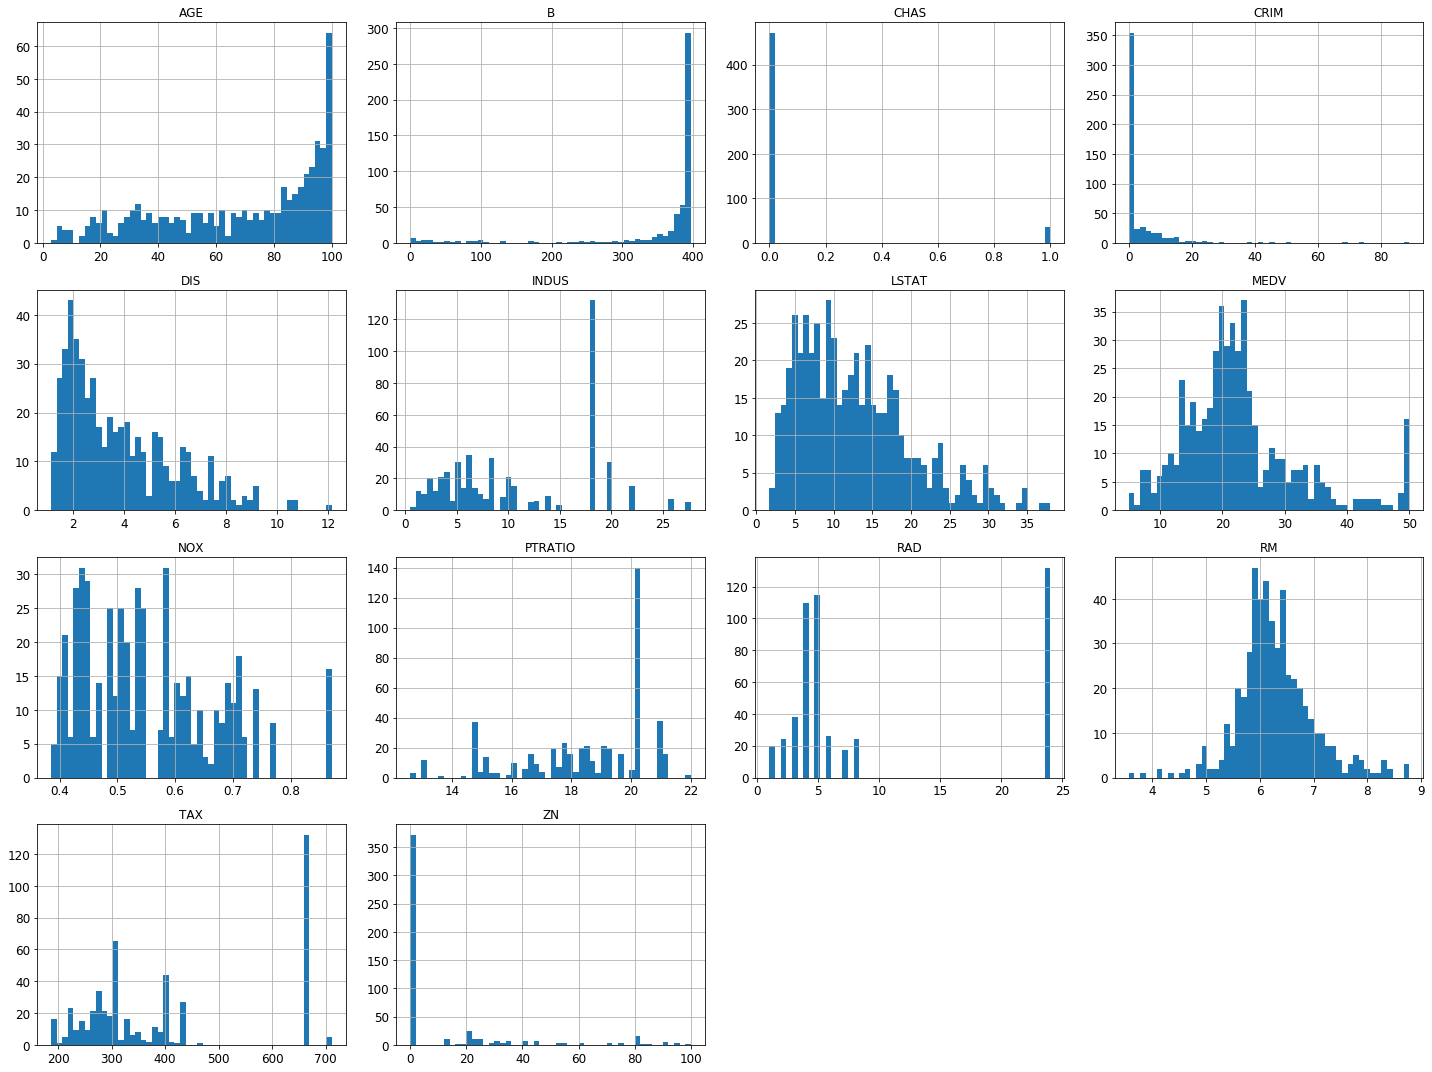

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

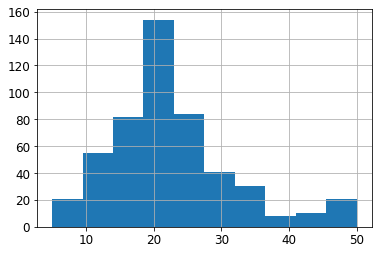

In [51]:
housing['MEDV'].hist()

In [0]:
housing["income_cat"] = pd.cut(housing["MEDV"],
                               bins=[0, 10, 16, 22, 28, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [53]:
housing["income_cat"].value_counts()

3    173
4    119
5    103
2     87
1     24
Name: income_cat, dtype: int64

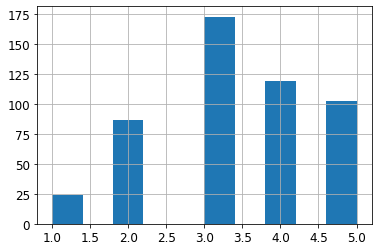

In [54]:
housing["income_cat"].hist()

In [0]:
# STRATIFIED DATA
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Step 3. Discover and visualize the data to gain insights

In [0]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

In [57]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

In [58]:
# Let's look at how much each feature correlates to the house value 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.712355
ZN         0.375496
B          0.313390
DIS        0.250274
CHAS       0.206198
RAD       -0.362716
CRIM      -0.371831
AGE       -0.382580
NOX       -0.422273
TAX       -0.457669
INDUS     -0.477141
PTRATIO   -0.496607
LSTAT     -0.730923
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe98a3c15f8>,
      dtype=object)

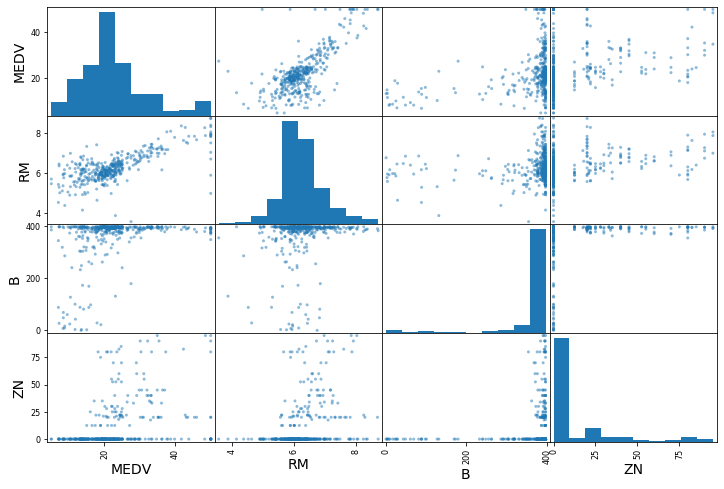

In [59]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "B",
              "ZN"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [60]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.556395,10.746287,11.114035,0.071782,0.555767,6.259913,69.083911,3.771928,9.297030,406.497525,18.397030,361.714926,12.767426,22.549257
std,8.836747,22.091606,6.890232,0.258447,0.116383,0.711838,27.841762,2.080513,8.607279,167.242020,2.222073,83.602500,7.232530,9.273992
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081960,0.000000,5.190000,0.000000,0.453000,5.871750,45.550000,2.102875,4.000000,277.000000,16.900000,376.847500,7.092500,17.175000
50%,0.252930,0.000000,9.690000,0.000000,0.538000,6.157500,76.700000,3.167500,5.000000,332.000000,18.900000,392.015000,11.430000,21.050000
75%,3.023262,12.500000,18.100000,0.000000,0.624000,6.569000,94.425000,5.104475,12.000000,666.000000,20.200000,396.900000,17.102500,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Step 4. Data Cleaning

In [0]:
# Create the features and labels for training
housing_prepared = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [81]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,income_cat


In [82]:
print(housing.shape)
print(housing_prepared.shape)

(404, 14)
(404, 14)


In [83]:
housing_prepared

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,income_cat
152,1.12658,0.0,19.58,1,0.8710,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,2
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304.0,16.9,394.02,12.43,3
287,0.03871,52.5,5.32,0,0.4050,6.209,31.3,7.3172,6,293.0,16.6,396.90,7.14,4
82,0.03659,25.0,4.86,0,0.4260,6.302,32.2,5.4007,4,281.0,19.0,396.90,6.72,4
272,0.11460,20.0,6.96,0,0.4640,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.97617,0.0,21.89,0,0.6240,5.757,98.4,2.3460,4,437.0,21.2,262.76,17.31,2
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348.0,14.7,395.38,3.11,5
212,0.21719,0.0,10.59,1,0.4890,5.807,53.8,3.6526,4,277.0,18.6,390.94,16.03,4
269,0.09065,20.0,6.96,1,0.4640,5.920,61.5,3.9175,3,223.0,18.6,391.34,13.65,3


# Step 5. Select and train a model 



---


**Linear regression model**

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# fit the data in the model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# make predictions
housing_predictions = lin_reg.predict(housing_prepared)

In [86]:
# evaluate performance with rmse
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.586580101263667

In [87]:
# evaluate performance with mae
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

2.5879412475807833

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [89]:
# cross validate
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.20959167 3.33476012 3.30864261 3.00690128 4.4446558  4.13556813
 4.75942461 2.70218675 3.90740041 3.9303477 ]
Mean: 3.773947910053966
Standard deviation: 0.626918336495118




---


**Decision Tree Regressor**

In [90]:
from sklearn.tree import DecisionTreeRegressor

# fit the data to the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [0]:
# make predictions
housing_predictions = tree_reg.predict(housing_prepared)

In [92]:
# evaluate with rmse
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [93]:

# cross validation with rmse
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [3.70714537 2.74332894 1.94447309 2.22929498 1.95857091 4.87696114
 2.62749881 2.38542449 2.08158593 1.92885977]
Mean: 2.648314343625703
Standard deviation: 0.9028883413017117




---
**Random Forest Regressor**

In [94]:
from sklearn.ensemble import RandomForestRegressor

# fit data to the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [95]:
# make predictions
housing_predictions = forest_reg.predict(housing_prepared)

# evaluate performance with rmse
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.795851314226742

In [96]:
# cross validate
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.06994256 2.23844828 1.27065426 1.94310021 1.93872919 3.21969813
 2.4853364  1.49654867 1.8761109  1.84058971]
Mean: 2.037915830374302
Standard deviation: 0.5102694086532935


# Step 6. Fine tune your model

In [102]:
# use randomized search to fine tune

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [103]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.283159154557979 {'max_features': 7, 'n_estimators': 180}
2.6545302344166473 {'max_features': 5, 'n_estimators': 15}
2.6402097726291567 {'max_features': 3, 'n_estimators': 72}
2.537106491703128 {'max_features': 5, 'n_estimators': 21}
2.277331430180591 {'max_features': 7, 'n_estimators': 122}
2.6259159984094387 {'max_features': 3, 'n_estimators': 75}
2.636571722698249 {'max_features': 3, 'n_estimators': 88}
2.412434771695431 {'max_features': 5, 'n_estimators': 100}
2.647637846508233 {'max_features': 3, 'n_estimators': 150}
2.9634543313629913 {'max_features': 5, 'n_estimators': 2}


In [118]:
# rank the relative importance of each attribute

feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.03421591, 0.00114703, 0.01991232, 0.00221726, 0.01608549,
       0.19290713, 0.01602844, 0.02496522, 0.00243831, 0.00668637,
       0.02060265, 0.0074471 , 0.16279774, 0.49254904])

In [0]:
# train data on final model and present performance

final_model = rnd_search.best_estimator_

X_test_prepared = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
#  final_scores = cross_val_score(final_model, X_test_prepared, y_test,
#                               scoring="neg_mean_squared_error", cv=10)
#  final_rmse_scores = np.sqrt(-lin_scores)
#  display_scores(final_rmse_scores)

In [125]:
final_rmse

1.9324174989025704

In [126]:
# compute a 95% confidence interval for the test rmse:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.45430004, 2.31376018])

# Step 7. Present the solution

**Data processing**


1.   Extract data from URL from my github (to where I uploaded the raw file)
2.   read in data as a data frame
3.   cast dtype from objects to numerics
4.   visualize the data to gain some insights into factors most impactful
5.   I first split the data directly, but results showed that stratified split leads to better performance, so I stratified the data according to the distribution of MEDV
6.   I checked if any data is missing, and there's none


**Train models on the data**


Train the linear regression model, decision tree regressor, and random forest regressor separately on the test_set, and evaluate their performance on the rmse value and cross-check scores, which are presented as followed:

![alt text](https://raw.githubusercontent.com/vivianchen98/boston_housing_price/master/performance%20table.png)

Clearly, linear regression is relatively an underfit, while decision tree overfits the data with zero error. Among the three models, random forest is the most suitable.

**Fine tune**

use the randomized search to fit the data and determine the optimal hyperparameters;

Then train the final model based on best_estimator_ of the random search, make predictions given the final model and evaluate the performance:

> final model's rmse: 1.932

> with a 95% confidence level in [1.454, 2.314]
